In [13]:
import pandas as pd
from libs.parser import *

import matplotlib.pyplot as plt
from collections import defaultdict
from matplotlib.ticker import FuncFormatter





In [14]:
yibo_dataset_path = "/u/1/chenyang/benchmark_data/larger_matrix_exp/larger_mat_exp_result/yibo_large_dataset.csv"
pd_yibo_dataset = pd.read_csv(yibo_dataset_path)


In [15]:


trial_dir = "/u/1/chenyang/benchmark_data/larger_matrix_exp/larger_mat_exp_result/trial_4"
data_trial = []   
for fname in os.listdir(trial_dir):
    if "Pardiso" in fname:
        solver = "Eigen::PardisoLDLT"
    elif "AMGCL" in fname:
        solver = "AMGCL"
    elif "Hypre" in fname:
        solver = "Hypre"

    log_path = os.path.join(trial_dir, fname)
    data = parse_log_file(log_path, solver)
    data_trial.extend(data)


In [16]:
grouped_data = defaultdict(lambda: {"mat_sz": [], "clock_time": []})

for entry in data_trial:
    solver = entry["solver"]
    mat_sz = entry["mat_sz"]
    clock_time = entry["clock_time"]
    
    # Create label based on solver and tolerance
    if solver == "Eigen::PardisoLDLT":
        label = "Pardiso"
    else:
        tol = entry.get("solver_tol", None)
        if tol is not None:
            label = f"{solver}-{tol:.0e}"
        else:
            label = solver
    
    grouped_data[label]["mat_sz"].append(mat_sz)
    grouped_data[label]["clock_time"].append(clock_time)


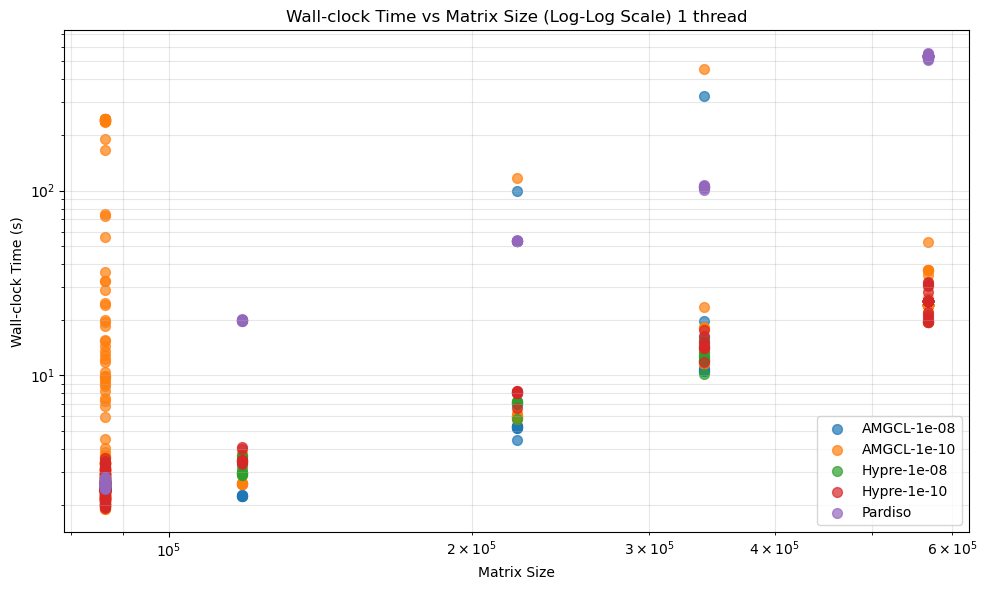

Total data points: 1246
Solver+Tolerance combinations: ['AMGCL-1e-08', 'Hypre-1e-08', 'Pardiso', 'Hypre-1e-10', 'AMGCL-1e-10']


In [17]:
# Create the plot
plt.figure(figsize=(10, 6))

for label, data in sorted(grouped_data.items()):
    plt.scatter(data["mat_sz"], data["clock_time"], label=label, alpha=0.7, s=50)

plt.xscale('log')
plt.yscale('log')
plt.xlabel("Matrix Size")
plt.ylabel("Wall-clock Time (s)")
plt.title("Wall-clock Time vs Matrix Size (Log-Log Scale) 1 thread")
plt.legend()
plt.grid(True, alpha=0.3, which='both')
plt.tight_layout()
plt.savefig("walltime_vs_matsize.png", dpi=300)
plt.show()

print(f"Total data points: {len(data_trial)}")
print(f"Solver+Tolerance combinations: {list(grouped_data.keys())}")

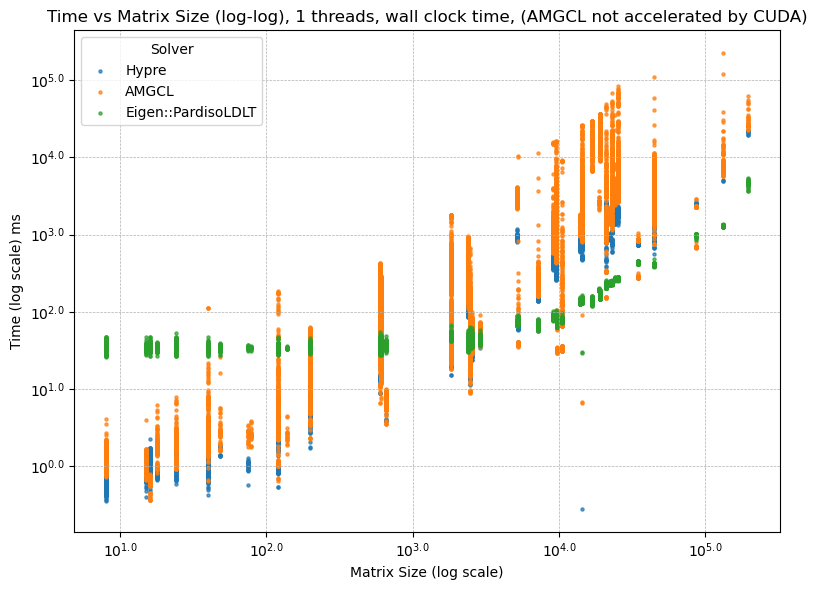

In [18]:
df_now = pd_yibo_dataset.copy()
# df_filtered = df_now[df_now["mat_sz"] >= 100].copy()
# df_now["mat_sz_log_rounded"] = df_filtered["mat_sz_log"].round(1)


colors = plt.cm.tab10.colors  # 或者 plt.cm.Set1, plt.cm.Paired 等等
solvers = df_now["solver"].unique()


def log_tick_formatter(val, pos=None):
    return r"$10^{%.1f}$" % val

plt.figure(figsize=(8, 6))

for i, solver in enumerate(solvers):
    group = df_now[df_now["solver"] == solver]
    plt.scatter(
        group["mat_sz_log"], group["time_log"],
        alpha=0.7, s=5,
        color=colors[i % len(colors)],
        label=solver
    )
plt.gca().xaxis.set_major_formatter(FuncFormatter(log_tick_formatter))
plt.gca().yaxis.set_major_formatter(FuncFormatter(log_tick_formatter))

plt.xlabel("Matrix Size (log scale)")
plt.ylabel("Time (log scale) ms")
plt.title("Time vs Matrix Size (log-log), 1 threads, wall clock time, (AMGCL not accelerated by CUDA)")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.legend(title="Solver")
plt.tight_layout()
plt.show()


In [21]:
# create a new dataframe
# it has keys solver, mat_sz, time
df_combined = pd.DataFrame(columns=["solver", "mat_sz", "time"])
for i, data in enumerate(data_trial):
    print("my_data", i)
    solver = data["solver"]
    if solver == "Eigen::PardisoLDLT":
        label = "Pardiso"
    else:
        tol = data.get("solver_tol", None)
        if tol is not None:
            label = f"{solver}-{tol:.0e}"
        else:
            label = solver


    temp_df = pd.DataFrame({
        "solver": [label],
        "mat_sz": [data["mat_sz"]],
        "time": [data["clock_time"]]
    })
    df_combined = pd.concat([df_combined, temp_df], ignore_index=True)

# now add the data from pd_yibo_dataset
for i, item in enumerate(pd_yibo_dataset.itertuples()):
    if i % 1000 == 0:
        print("large_dataset", i)
    if item.solver != "Eigen::PardisoLDLT":
        solver_name = item.solver + "1e-10"
    else:
        solver_name = item.solver
    solver_name += "before"
    temp_df = pd.DataFrame({
        "solver": [solver_name],
        "mat_sz": [item.mat_sz],
        "time": [item.time*0.001]
    })
    df_combined = pd.concat([df_combined, temp_df], ignore_index=True)

my_data 0
my_data 1
my_data 2
my_data 3
my_data 4
my_data 5
my_data 6
my_data 7
my_data 8
my_data 9
my_data 10
my_data 11
my_data 12
my_data 13
my_data 14
my_data 15
my_data 16
my_data 17
my_data 18
my_data 19
my_data 20
my_data 21
my_data 22
my_data 23
my_data 24
my_data 25
my_data 26
my_data 27
my_data 28
my_data 29
my_data 30
my_data 31
my_data 32
my_data 33
my_data 34
my_data 35
my_data 36
my_data 37
my_data 38
my_data 39
my_data 40
my_data 41
my_data 42
my_data 43
my_data 44
my_data 45
my_data 46
my_data 47
my_data 48
my_data 49
my_data 50
my_data 51
my_data 52
my_data 53
my_data 54
my_data 55
my_data 56
my_data 57
my_data 58
my_data 59
my_data 60
my_data 61
my_data 62
my_data 63
my_data 64
my_data 65
my_data 66
my_data 67
my_data 68
my_data 69
my_data 70
my_data 71
my_data 72
my_data 73
my_data 74
my_data 75
my_data 76
my_data 77
my_data 78
my_data 79
my_data 80
my_data 81
my_data 82
my_data 83
my_data 84
my_data 85
my_data 86
my_data 87
my_data 88
my_data 89
my_data 90
my_data 9

/tmp/ipykernel_3969268/3565544646.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_combined = pd.concat([df_combined, temp_df], ignore_index=True)


my_data 823
my_data 824
my_data 825
my_data 826
my_data 827
my_data 828
my_data 829
my_data 830
my_data 831
my_data 832
my_data 833
my_data 834
my_data 835
my_data 836
my_data 837
my_data 838
my_data 839
my_data 840
my_data 841
my_data 842
my_data 843
my_data 844
my_data 845
my_data 846
my_data 847
my_data 848
my_data 849
my_data 850
my_data 851
my_data 852
my_data 853
my_data 854
my_data 855
my_data 856
my_data 857
my_data 858
my_data 859
my_data 860
my_data 861
my_data 862
my_data 863
my_data 864
my_data 865
my_data 866
my_data 867
my_data 868
my_data 869
my_data 870
my_data 871
my_data 872
my_data 873
my_data 874
my_data 875
my_data 876
my_data 877
my_data 878
my_data 879
my_data 880
my_data 881
my_data 882
my_data 883
my_data 884
my_data 885
my_data 886
my_data 887
my_data 888
my_data 889
my_data 890
my_data 891
my_data 892
my_data 893
my_data 894
my_data 895
my_data 896
my_data 897
my_data 898
my_data 899
my_data 900
my_data 901
my_data 902
my_data 903
my_data 904
my_data 905
my_d

/u/1/chenyang/miniconda3/envs/benchmark/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/u/1/chenyang/miniconda3/envs/benchmark/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


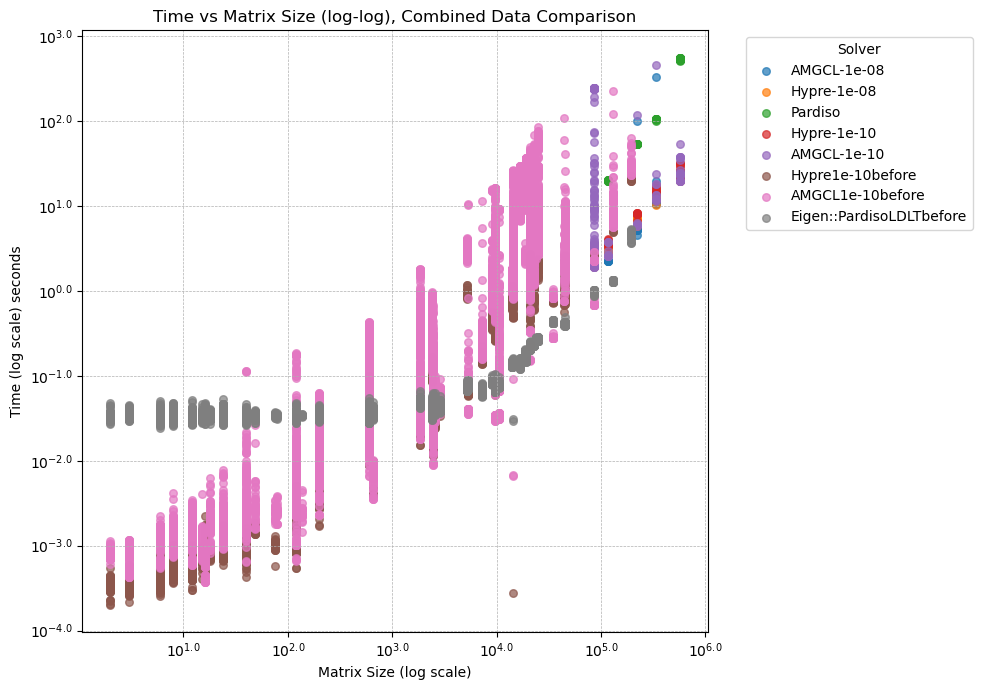

In [22]:
# now we have df_combined, let us plot it again
import numpy as np

# Convert to numeric types first
df_combined["mat_sz"] = pd.to_numeric(df_combined["mat_sz"])
df_combined["time"] = pd.to_numeric(df_combined["time"])

# Add log columns
df_combined["mat_sz_log"] = np.log10(df_combined["mat_sz"])
df_combined["time_log"] = np.log10(df_combined["time"])

# Plot
colors = plt.cm.tab10.colors
solvers = df_combined["solver"].unique()

def log_tick_formatter(val, pos=None):
    return r"$10^{%.1f}$" % val

plt.figure(figsize=(10, 7))

for i, solver in enumerate(solvers):
    group = df_combined[df_combined["solver"] == solver]
    plt.scatter(
        group["mat_sz_log"], group["time_log"],
        alpha=0.7, s=30,
        color=colors[i % len(colors)],
        label=solver
    )

plt.gca().xaxis.set_major_formatter(FuncFormatter(log_tick_formatter))
plt.gca().yaxis.set_major_formatter(FuncFormatter(log_tick_formatter))

plt.xlabel("Matrix Size (log scale)")
plt.ylabel("Time (log scale) seconds")
plt.title("Time vs Matrix Size (log-log), Combined Data Comparison")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.legend(title="Solver", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()